In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from random import uniform

In [62]:
# PROBLEM 1
# Please follow the link below to view the computational graph
# Forward values
# https://docs.google.com/drawings/d/1uIBFR8uk3-pX_kvtoGBbzFnxD994zQ1gplEC8mWlMbc/edit?usp=sharing

In [63]:
# PROBLEM 2
# Find partial derivatives of function 𝑓(𝑥, 𝑦, 𝑧) as defined in the first problem, with respect to x, y and z by using tf. GradientTape()
# Initialize tensorflow variables
x = tf.Variable(-1.0)
y = tf.Variable(2.0)
z = tf.Variable(3.0)

# Use GradientTape context manager
with tf.GradientTape(persistent=True) as t1:
    # Watch all three variables in the function
    t1.watch(x)
    t1.watch(y)
    t1.watch(z)
    # Define function
    f = x/y + z**2 + x
# Get gradients of the defined function with respect to each variable
df_dx = t1.gradient(f, x)
df_dy = t1.gradient(f, y)
df_dz = t1.gradient(f, z)
# Print out results
print('Partial Derivatives of f with respect to...')
print(f'x is: {df_dx.numpy()}')
print(f'y is: {df_dy.numpy()}')
print(f'z is: {df_dz.numpy()}')

Partial Derivatives of f with respect to...
x is: 1.5
y is: 0.25
z is: 6.0


In [64]:
# PROBLEM 3
# Please follow the link below to view the computational graph
# https://docs.google.com/drawings/d/1V_aLl27eEEYoEIiEEkZIst6t6aeQFKcAdMAn5VKRljA/edit?usp=sharing

# Initialize tensorflow variables
x = tf.Variable(-1.0)
y = tf.Variable(2.0)
z = tf.Variable(3.0)

from math import e
def sigmoid(q):
    '''Standard sigmoid function.'''
    return 1/(1+e**-q)

# Use GradientTape context manager
with tf.GradientTape(persistent=True) as t2:
    # Watch the two variables in the function
    t2.watch(x)
    t2.watch(y)
    # Defin the function
    f = (x + sigmoid(-y)) / (y**2)
# Get gradients of the defined function with respect to each variable
df_dx = t2.gradient(f, x)
df_dy = t2.gradient(f, y)
# Print out results
print('Partial Derivatives of f with respect to...')
print(f'x is: {df_dx.numpy()}')
print(f'y is: {df_dy.numpy()}')


Partial Derivatives of f with respect to...
x is: 0.25
y is: 0.19395087659358978


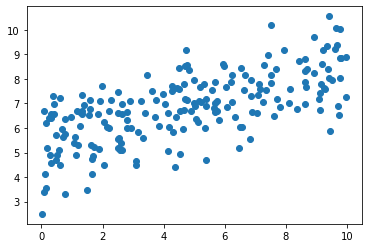

In [219]:
# Create a set of 200 datapoints
# Use numpy to sample from the uniform distribution beween 0 and 10
low = 0
high = 10
X = np.random.default_rng().uniform(low,high,num_data_points)
# Calcuate raw y values
y_raw = 0.3*X + 2
# Get the mean of those y values
y_raw_mean = np.mean(y_raw)
# Generate gaussian noise with 1 standard deviation of the mean, using the mean of the y_raw values
noise = np.random.normal(y_raw_mean,1,num_data_points)
# Add the noise to the raw y values to get the y values
y = y_raw + noise
# Plot x vs y
plt.scatter(X,y)


In [220]:
# Initialize m (slope) and b (y intercept) as 
mid = float((low + high) / 2)
m = tf.Variable(mid)
b = tf.Variable(mid)
learning_rate = 0.001
epochs = 100

def mse(y_true, y_hat):
    return tf.reduce_mean(tf.square(y_true - y_hat))

def predict(m, X, b):
    return tf.add(tf.multiply(m, X), b)

def learn(X, y, learning_rate):
    with tf.GradientTape(persistent=True) as t3:
        t3.watch(m)
        t3.watch(b)
        loss = mse(y, predict(m, X, b))
        print(f'Loss: {loss}')

    dy_dm = t3.gradient(loss, m)
    dy_db = t3.gradient(loss, b)
    m.assign_sub(dy_dm * learning_rate)
    b.assign_sub(dy_db * learning_rate)


def train(X, y, learning_rate, epochs):    
    for i in range(epochs):
        print("Epoch: ", i)
        learn(X, y, learning_rate)
    return np.mean(m.numpy()), np.mean(b.numpy())
    # return np.mean(m.numpy()), np.mean(b.numpy())

m_pred, b_pred = train(X, y, learning_rate, epochs)

Epoch:  0
Loss: 667.843505859375
Epoch:  1
Loss: 585.8368530273438
Epoch:  2
Loss: 513.9215698242188
Epoch:  3
Loss: 450.85565185546875
Epoch:  4
Loss: 395.55023193359375
Epoch:  5
Loss: 347.0503845214844
Epoch:  6
Loss: 304.5185852050781
Epoch:  7
Loss: 267.2204895019531
Epoch:  8
Loss: 234.51211547851562
Epoch:  9
Loss: 205.82859802246094
Epoch:  10
Loss: 180.67466735839844
Epoch:  11
Loss: 158.61602783203125
Epoch:  12
Loss: 139.27171325683594
Epoch:  13
Loss: 122.30780029296875
Epoch:  14
Loss: 107.43132781982422
Epoch:  15
Loss: 94.38542938232422
Epoch:  16
Loss: 82.94483184814453
Epoch:  17
Loss: 72.91203308105469
Epoch:  18
Loss: 64.11376190185547
Epoch:  19
Loss: 56.39811706542969
Epoch:  20
Loss: 49.631866455078125
Epoch:  21
Loss: 43.69819259643555
Epoch:  22
Loss: 38.49464797973633
Epoch:  23
Loss: 33.931373596191406
Epoch:  24
Loss: 29.929590225219727
Epoch:  25
Loss: 26.420194625854492
Epoch:  26
Loss: 23.342609405517578
Epoch:  27
Loss: 20.643686294555664
Epoch:  28
Loss:

1.3642551

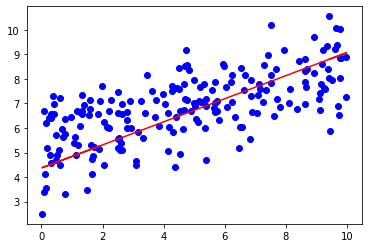

In [221]:
fig, ax = plt.subplots()
ax.scatter(X, y, c="blue")
best_fit_line_values = [m_pred * i + b_pred for i in X]
ax.plot(X, best_fit_line_values, c='red')